In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
import os 

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs,
                                            get_runs_paths)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)
from opdynamics.utils.plotting.plotting import heat_plot

In [3]:
params = parse_experiment_params("../experiments_params/two_polarized_group_plus_neutral.json") + parse_experiment_params("../experiments_params/two_polarized_group_plus_neutral_2.json")
results = get_experiment_mean_data(params, "../results/two_polarized_group_plus_neutral/")

In [4]:
params__ = parse_experiment_params("../experiments_params/two_polarized_group_plus_neutral_lambda_1_kappa_25.json") + parse_experiment_params("../experiments_params/two_polarized_group_plus_neutral_lambda_1_kappa_25_2.json")
results__ = get_experiment_mean_data(params__, "../results/two_polarized_group_plus_neutral_lambda_1_kappa_25/")

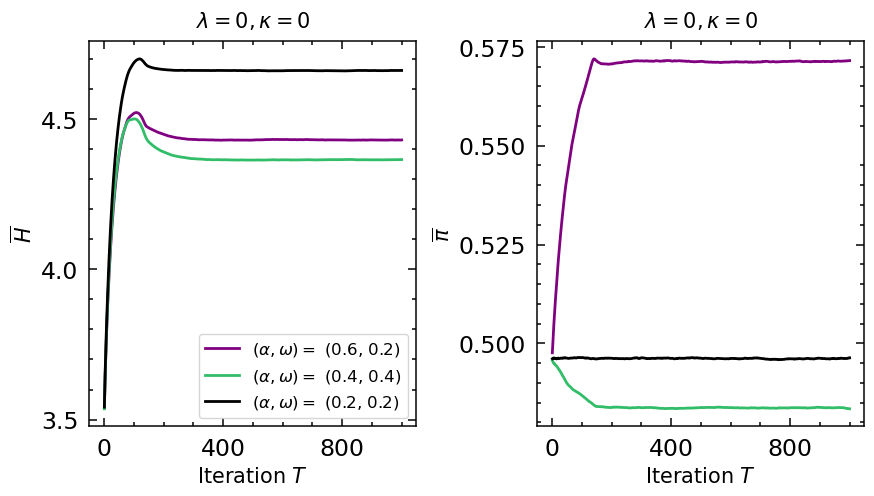

In [5]:
# parameters

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 0$",
    r"$\lambda = 0, \kappa = 0$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"$\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# plot
line_width = 2

alpha_omega_color =  {
    (0.6, 0.2): "purple",
    (0.4, 0.4): "#32BD68",
    # (0.6, 0.2): "y",
    (0.2, 0.2): "k",
    (0.2, 0.6): "darkgreen",
    # (0.5, 0.4): "r"
}

valid_combinations = {
    # (0.7, 0.1),
    (0.6, 0.2),
    # (0.5, 0.4),
    (0.4, 0.4),
    (0.2, 0.2),
    # (0.2, 0.6)
}

X = np.arange(1, 1000 + 1)

selected_params = [x for x in params if \
    x['kappa'] == 0 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[0].plot(
        X,
        results[make_tuple(p, True)]['entropy'][:1000],
        c = alpha_omega_color[(p['alpha'], p['omega'])],
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )

selected_params = [x for x in params if \
    x['kappa'] == 0 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[1].plot(
        X,
        results[make_tuple(p, True)]['polarity'][:1000],
        c = alpha_omega_color[(p['alpha'], p['omega'])],
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )

axs[0].legend(loc = 'lower right', fontsize = 12)

fig.subplots_adjust(wspace = 0.37)
axs[1].set_ylabel(r"$\overline{\pi}$")

# axs[1].set_ylim([0.49, 0.59])

from matplotlib.ticker import MaxNLocator
axs[1].yaxis.set_major_locator(MaxNLocator(4))

0.14488264266304346
0.15484803427419355


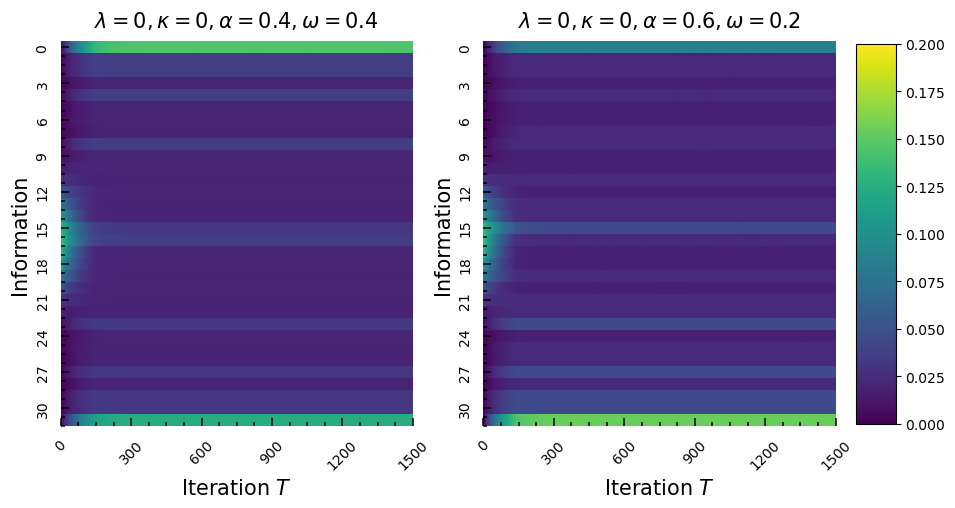

In [7]:
from matplotlib.ticker import MaxNLocator

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 0, \alpha = 0.4, \omega = 0.4$",
    r"$\lambda = 0, \kappa = 0, \alpha = 0.6, \omega = 0.2$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = ""
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = ""
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))
fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# ************

mins = []
maxs = []

param = selected_params = [x for x in params if x['kappa'] == 0 and x['lambd'] == 0 and x['alpha'] == 0.4 and x["omega"] == 0.4].pop()
data = results[make_tuple(param, True)]
print(data['distribution'][:500].max())
maxs.append(data['distribution'][:500].max())
mins.append(data['distribution'][:500].min())
_, ax = heat_plot(data['distribution'][:500], cmap = 'viridis', fig = fig, ax = axs[0], vmax = 0.20)

axs[0].set_ylabel("Information")
axs[0].set_xlabel(r"Iteration $T$")

axs[0].tick_params(
    which = 'both',
    top = False,
    right = False,
    labelsize = 10
)

axs[0].xaxis.set_major_locator(MaxNLocator(5))
new_tick_locations = axs[0].get_xticks()
ticks = [int(x) for x in new_tick_locations]
axs[0].set_xticks(new_tick_locations)
axs[0].set_xticklabels(ticks, rotation = 45)




param = selected_params = [x for x in params if x['kappa'] == 0 and x['lambd'] == 0 and x['alpha'] == 0.6 and x["omega"] == 0.2].pop()
data = results[make_tuple(param, True)]
print(data['distribution'][:500].max())
maxs.append(data['distribution'][:500].max())
mins.append(data['distribution'][:500].min())
_, ax = heat_plot(data['distribution'][:500], cmap = 'viridis', fig = fig, ax = axs[1], vmax = 0.2)

axs[1].set_ylabel("Information")
axs[1].set_xlabel(r"Iteration $T$")

axs[1].tick_params(
    which = 'both',
    top = False,
    right = False,
    labelsize = 10
)

axs[1].xaxis.set_major_locator(MaxNLocator(5))
new_tick_locations = axs[1].get_xticks()
ticks = [int(x) for x in new_tick_locations]
axs[1].set_xticks(new_tick_locations)
axs[1].set_xticklabels(ticks, rotation = 45)


from matplotlib.colors import Normalize
import matplotlib.cm as cm
cbar_ax = fig.add_axes([0.92, 0.115, 0.04, 0.76])
cbar = fig.colorbar(
    cm.ScalarMappable(norm = Normalize(
        np.round(np.min(mins), 1),
        np.round(np.max(maxs), 1))
    ),
    cax = cbar_ax
)

(0.6, 0.2) 3.2241877484837427 0.00030159068427842593
(0.4, 0.4) 4.130746084243298 0.0002810092347758052
(0.2, 0.2) 4.434647429967663 0.0001671748718739585
(0.6, 0.2) 0.7385205909383588 4.299760972202952e-05
(0.4, 0.4) 0.5224282832512316 9.776089880820505e-05
(0.2, 0.2) 0.4756800459990958 5.9895140904687584e-05


Text(0, 0.5, '$\\overline{\\pi}$')

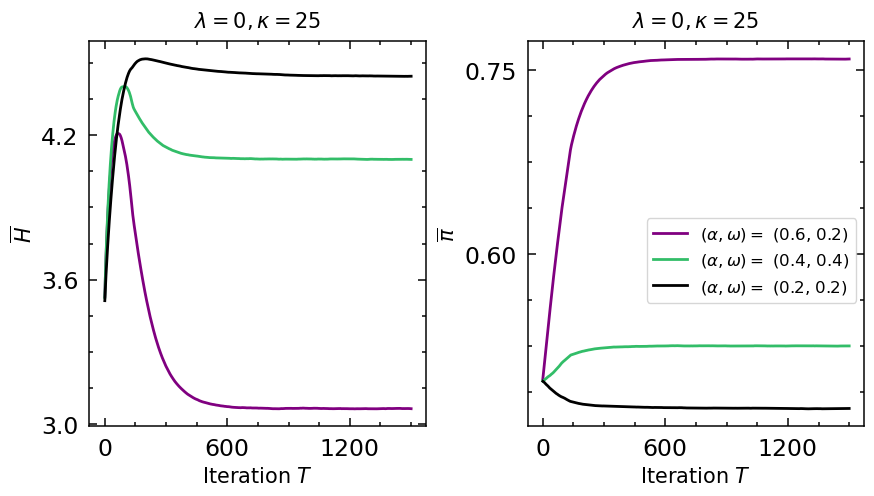

In [6]:
# parameters

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 25$",
    r"$\lambda = 0, \kappa = 25$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"$\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# plot
line_width = 2

alpha_omega_color =  {
    (0.6, 0.2): "purple",
    (0.4, 0.4): "#32BD68",
    # (0.6, 0.2): "y",
    (0.2, 0.2): "k",
    (0.2, 0.6): "darkgreen",
    # (0.5, 0.4): "r"
}

valid_combinations = {
    # (0.7, 0.1),
    (0.6, 0.2),
    # (0.5, 0.4),
    (0.4, 0.4),
    (0.2, 0.2),
    # (0.2, 0.6)
}

X = np.arange(1, 1500 + 1)

selected_params = [x for x in params if \
    x['kappa'] == 25 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[0].plot(
        X,
        results[make_tuple(p)]['entropy'],
        c = alpha_omega_color[(p['alpha'], p['omega'])],
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    print((p['alpha'], p['omega']), results[make_tuple(p, True)]['entropy'][:-100].mean(), results[make_tuple(p, True)]['entropy'][-100:].std())

selected_params = [x for x in params if \
    x['kappa'] == 25 \
        and x['lambd'] == 0 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[1].plot(
        X,
        results[make_tuple(p)]['polarity'],
        c = alpha_omega_color[(p['alpha'], p['omega'])],
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )
    print((p['alpha'], p['omega']), results[make_tuple(p, True)]['polarity'][:-100].mean(), results[make_tuple(p, True)]['polarity'][-100:].std())

axs[1].legend(loc = 'lower right', fontsize = 12, bbox_to_anchor=(1.0,0.3))

fig.subplots_adjust(wspace = 0.3)
axs[1].set_ylabel(r"$\overline{\pi}$")

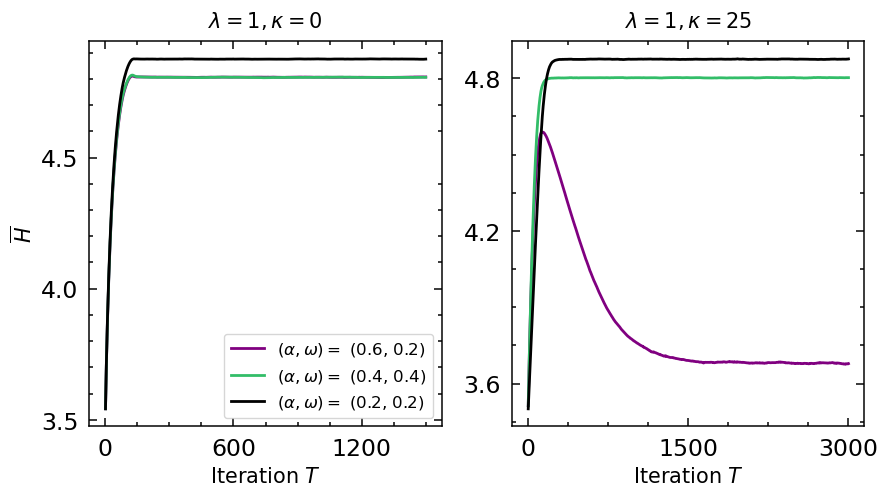

In [7]:
# parameters

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 1, \kappa = 0$",
    r"$\lambda = 1, \kappa = 25$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"$\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# plot
line_width = 2

alpha_omega_color =  {
    (0.6, 0.2): "purple",
    (0.4, 0.4): "#32BD68",
    # (0.6, 0.2): "y",
    (0.2, 0.2): "k",
    (0.2, 0.6): "darkgreen",
    # (0.5, 0.4): "r"
}

valid_combinations = {
    # (0.7, 0.1),
    (0.6, 0.2),
    # (0.5, 0.4),
    (0.4, 0.4),
    (0.2, 0.2),
    # (0.2, 0.6)
}

X = np.arange(1, 1500 + 1)

selected_params = [x for x in params if \
    x['kappa'] == 0 \
        and x['lambd'] == 1 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[0].plot(
        X,
        results[make_tuple(p)]['entropy'],
        c = alpha_omega_color[(p['alpha'], p['omega'])],
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )

X = np.arange(1, 3000 + 1)

selected_params = [x for x in params__ if \
    x['kappa'] == 25 \
        and x['lambd'] == 1 \
        and x['gamma'] == 0 \
        and (x['alpha'], x['omega']) in valid_combinations
]
for p in selected_params:
    axs[1].plot(
        X,
        results__[make_tuple(p)]['entropy'],
        c = alpha_omega_color[(p['alpha'], p['omega'])],
        linewidth = line_width,
        label = rf'$(\alpha, \omega) = $ ({p["alpha"]}, {p["omega"]})'
    )

axs[0].legend(loc = 'lower right', fontsize = 12)